# Object Detection with YOLOv8 (estimated time 20-30 mins)
<br>Last updated on 23/08/2024</br>
    <br>We aim to detect objects consisting of 20 classes: person, bird, cat, dog, horse, sheep, aeroplane, bicycle, boat, bicycle, boat, bus, car, motorbike, train, bottle, chair, dining table, potted plant, sofa, and TV monitor. **Pascal VOC Detection Dataset** (http://host.robots.ox.ac.uk/pascal/VOC/) and **YOLOv8** (https://docs.ultralytics.com/datasets/detect/voc/) are employed for the trial. The code is modified form https://colab.research.google.com/github/ultralytics/ultralytics/blob/main/examples/tutorial.ipynb. <br>

# Setup

Pip install `ultralytics` and [dependencies](https://github.com/ultralytics/ultralytics/blob/main/pyproject.toml) and check software and hardware.

[![PyPI - Version](https://img.shields.io/pypi/v/ultralytics?logo=pypi&logoColor=white)](https://pypi.org/project/ultralytics/) [![Downloads](https://static.pepy.tech/badge/ultralytics)](https://pepy.tech/project/ultralytics) [![PyPI - Python Version](https://img.shields.io/pypi/pyversions/ultralytics?logo=python&logoColor=gold)](https://pypi.org/project/ultralytics/)

In [1]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.83 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 33.0/78.2 GB disk)


# 1. Check the availability of CUDA (GPU-Nvidia)

In [2]:
! nvidia-smi

Fri Aug 30 12:25:23 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8              10W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

# 2. Predict

YOLOv8 may be used directly in the Command Line Interface (CLI) with a `yolo` command for a variety of tasks and modes and accepts additional arguments, i.e. `imgsz=640`. See a full list of available `yolo` [arguments](https://docs.ultralytics.com/usage/cfg/) and other details in the [YOLOv8 Predict Docs](https://docs.ultralytics.com/modes/train/).


In [3]:
# Run inference on an image with YOLOv8n
# set up device=0 refer to set cuda:0 (GPU)
!yolo predict model=yolov8n.pt source='https://ultralytics.com/images/zidane.jpg' device=0

100% 6.25M/6.25M [00:00<00:00, 225MB/s]
Ultralytics YOLOv8.2.83 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs

100% 49.2k/49.2k [00:00<00:00, 65.3MB/s]
image 1/1 /content/zidane.jpg: 384x640 2 persons, 1 tie, 86.0ms
Speed: 11.6ms preprocess, 86.0ms inference, 692.6ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


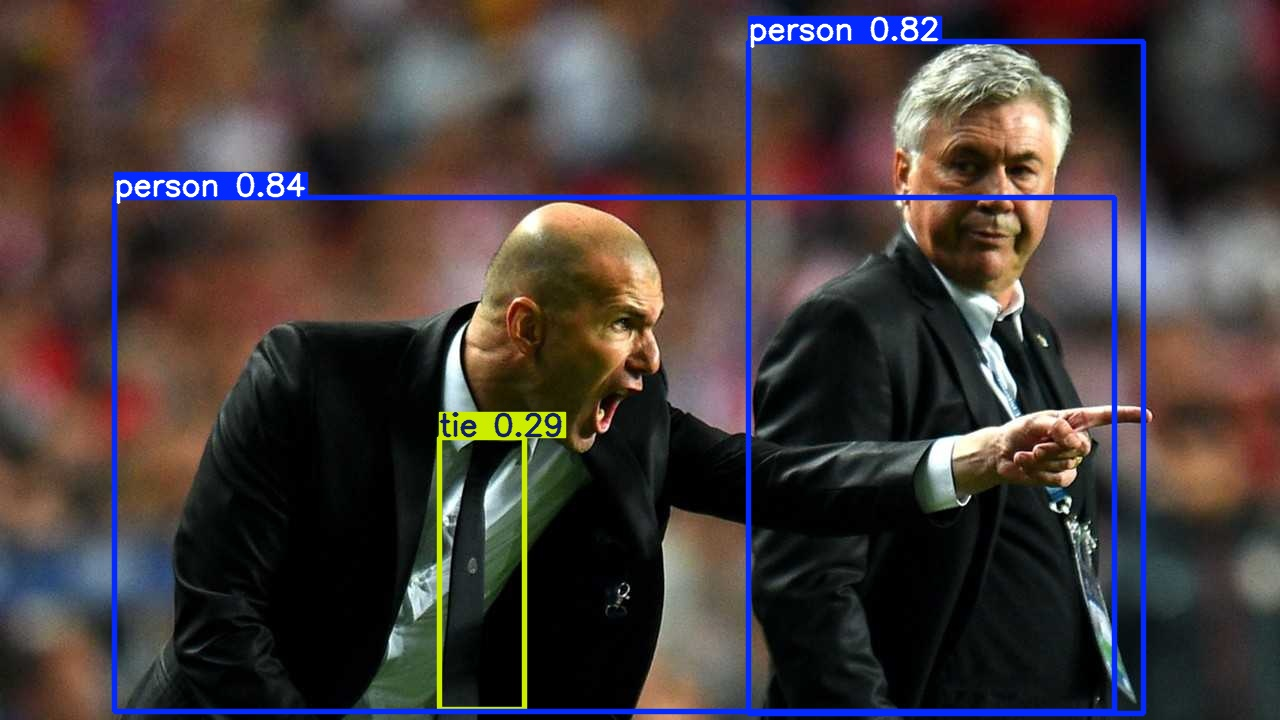

In [4]:
# Imports PIL module
from PIL import Image

# open method used to open different extension image file
im = Image.open("/content/runs/detect/predict/zidane.jpg")

# This method will show image in any image viewer
im

# 3. Train

<p align=""><a href="https://ultralytics.com/hub"><img width="1000" src="https://github.com/ultralytics/assets/raw/main/yolov8/banner-integrations.png"/></a></p>

Train YOLOv8 on [Detect](https://docs.ultralytics.com/tasks/detect/), [Segment](https://docs.ultralytics.com/tasks/segment/), [Classify](https://docs.ultralytics.com/tasks/classify/) and [Pose](https://docs.ultralytics.com/tasks/pose/) datasets. See [YOLOv8 Train Docs](https://docs.ultralytics.com/modes/train/) for more information.




---
Fortunately, ultralytics has hold the dataset on their own way that automatically download when it used. (NO Need dataset and dataloader)

The trained model will save on **/content/runs/train**


In [5]:
!yolo train data=VOC.yaml model=yolov8n.pt epochs=3 imgsz=640 device=0

Ultralytics YOLOv8.2.83 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=VOC.yaml, epochs=3, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width

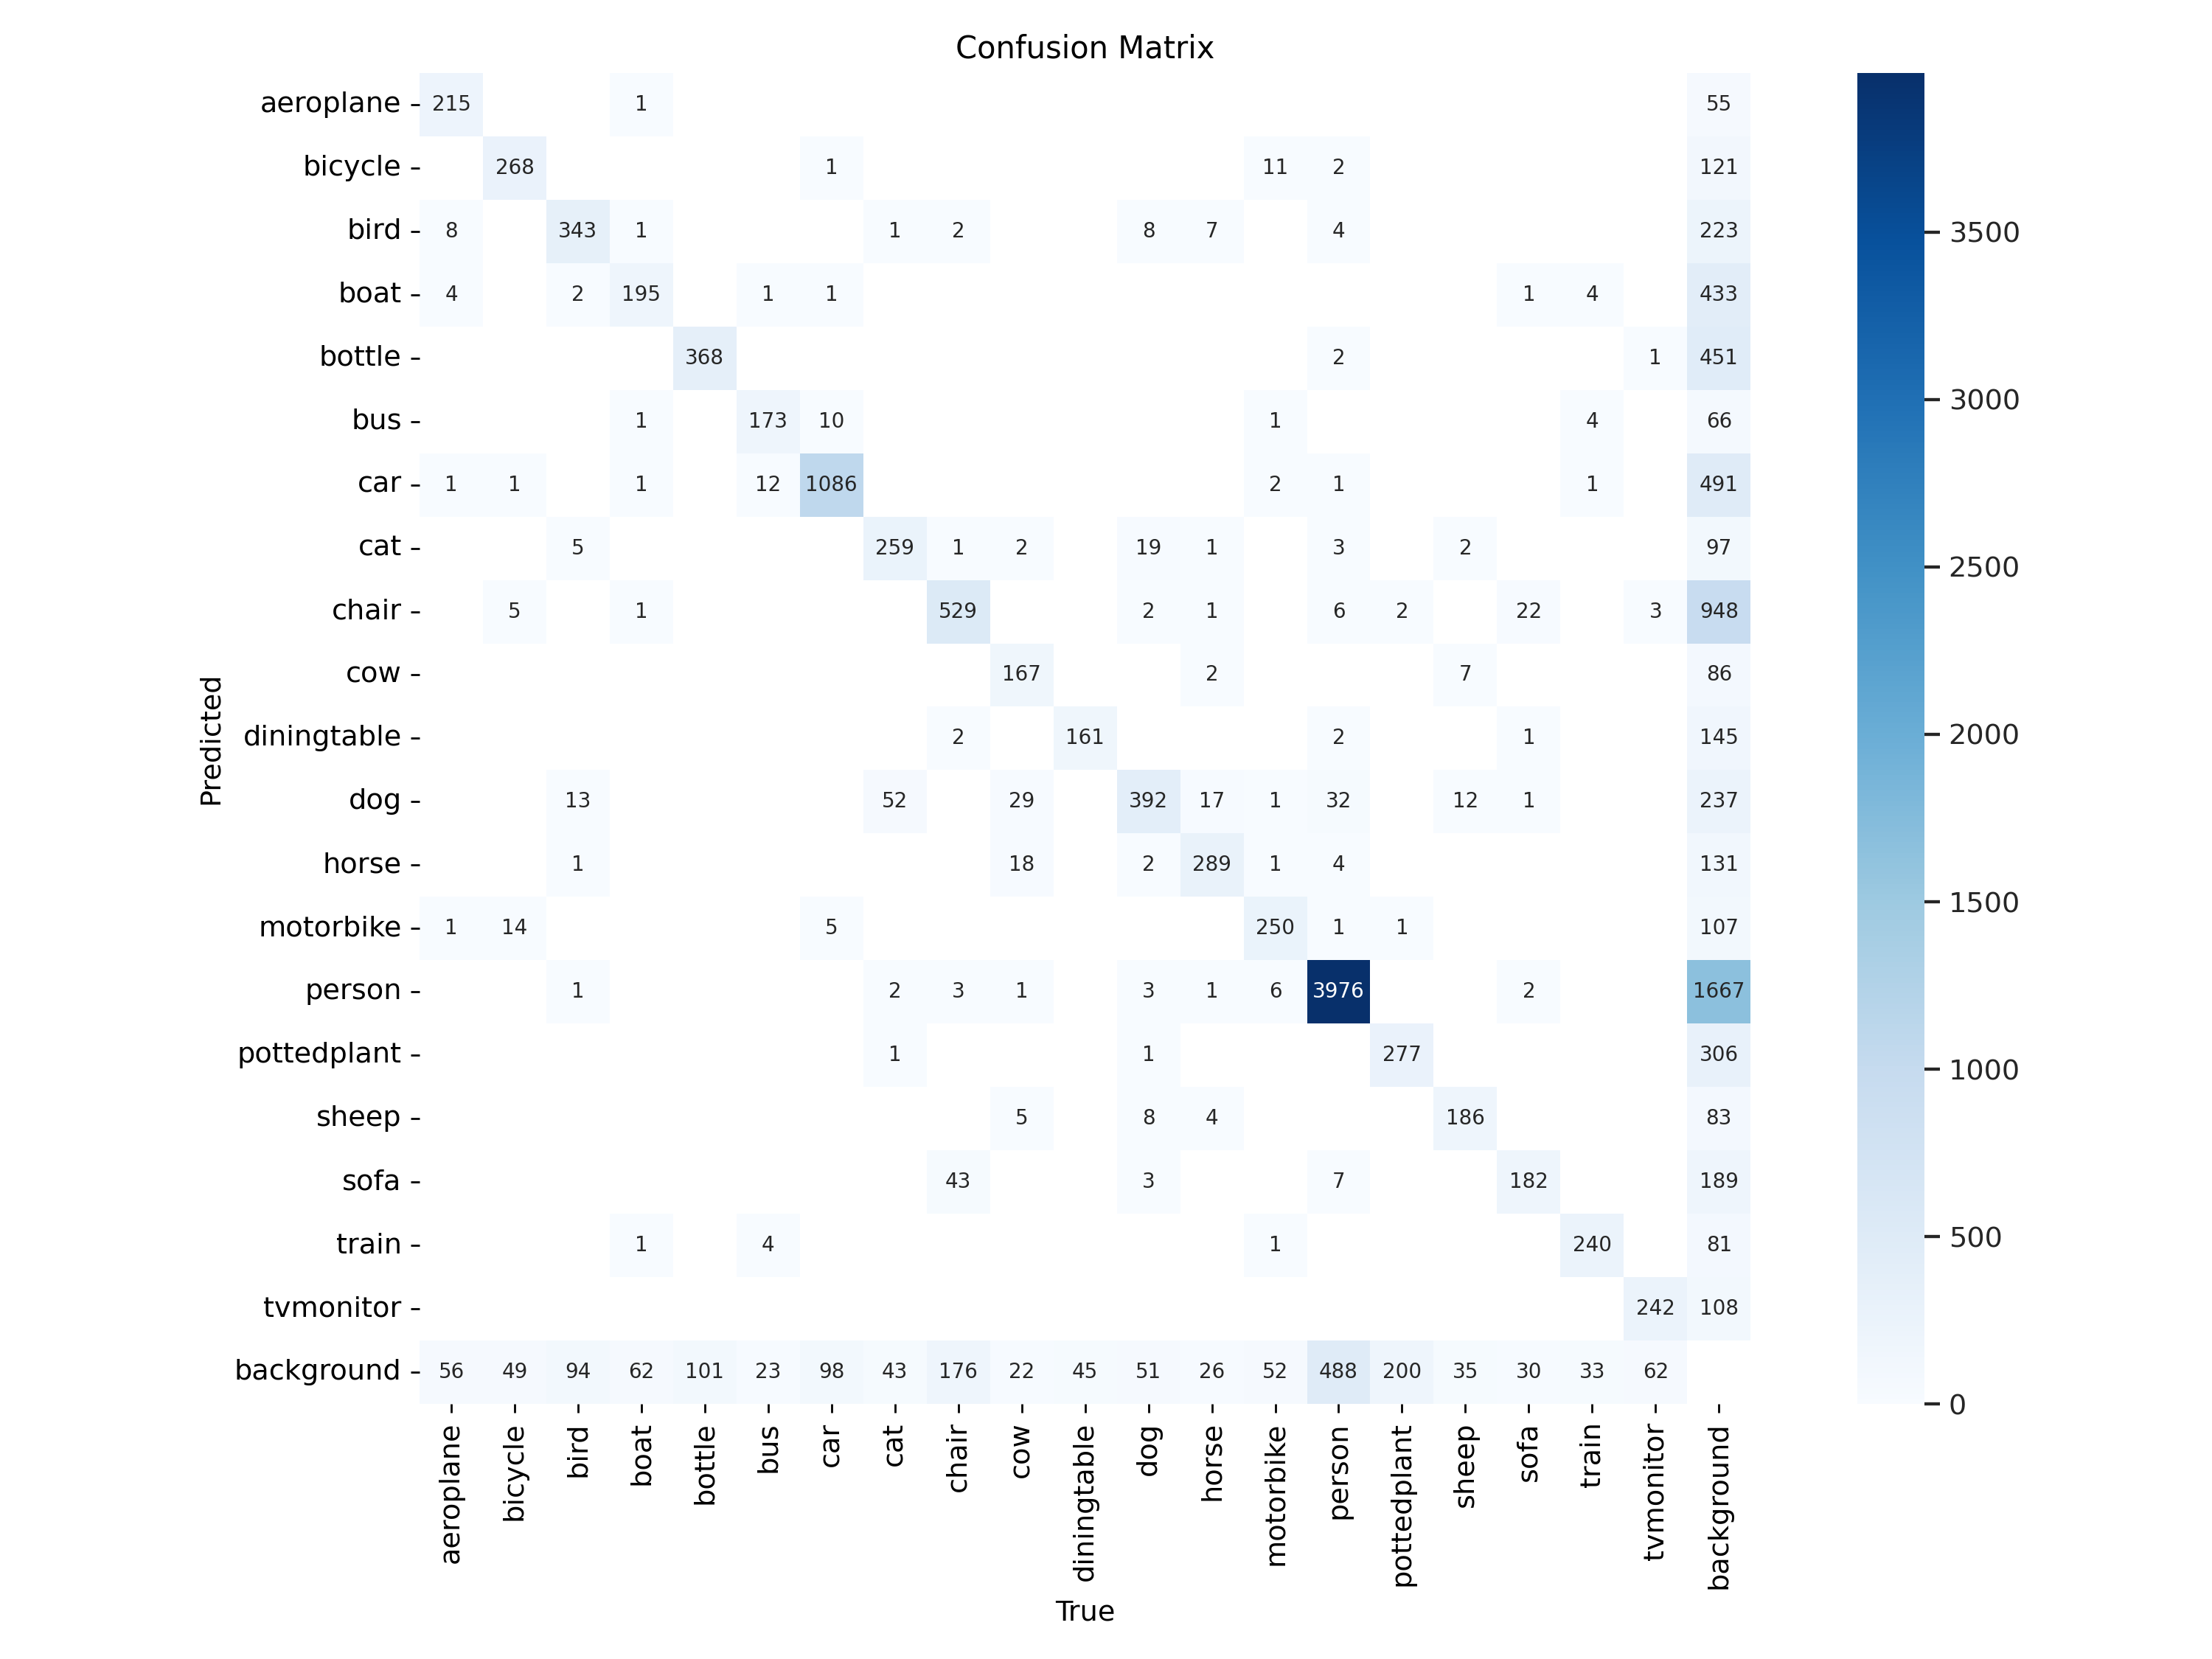

In [6]:
Image.open("/content/runs/detect/train/confusion_matrix.png")

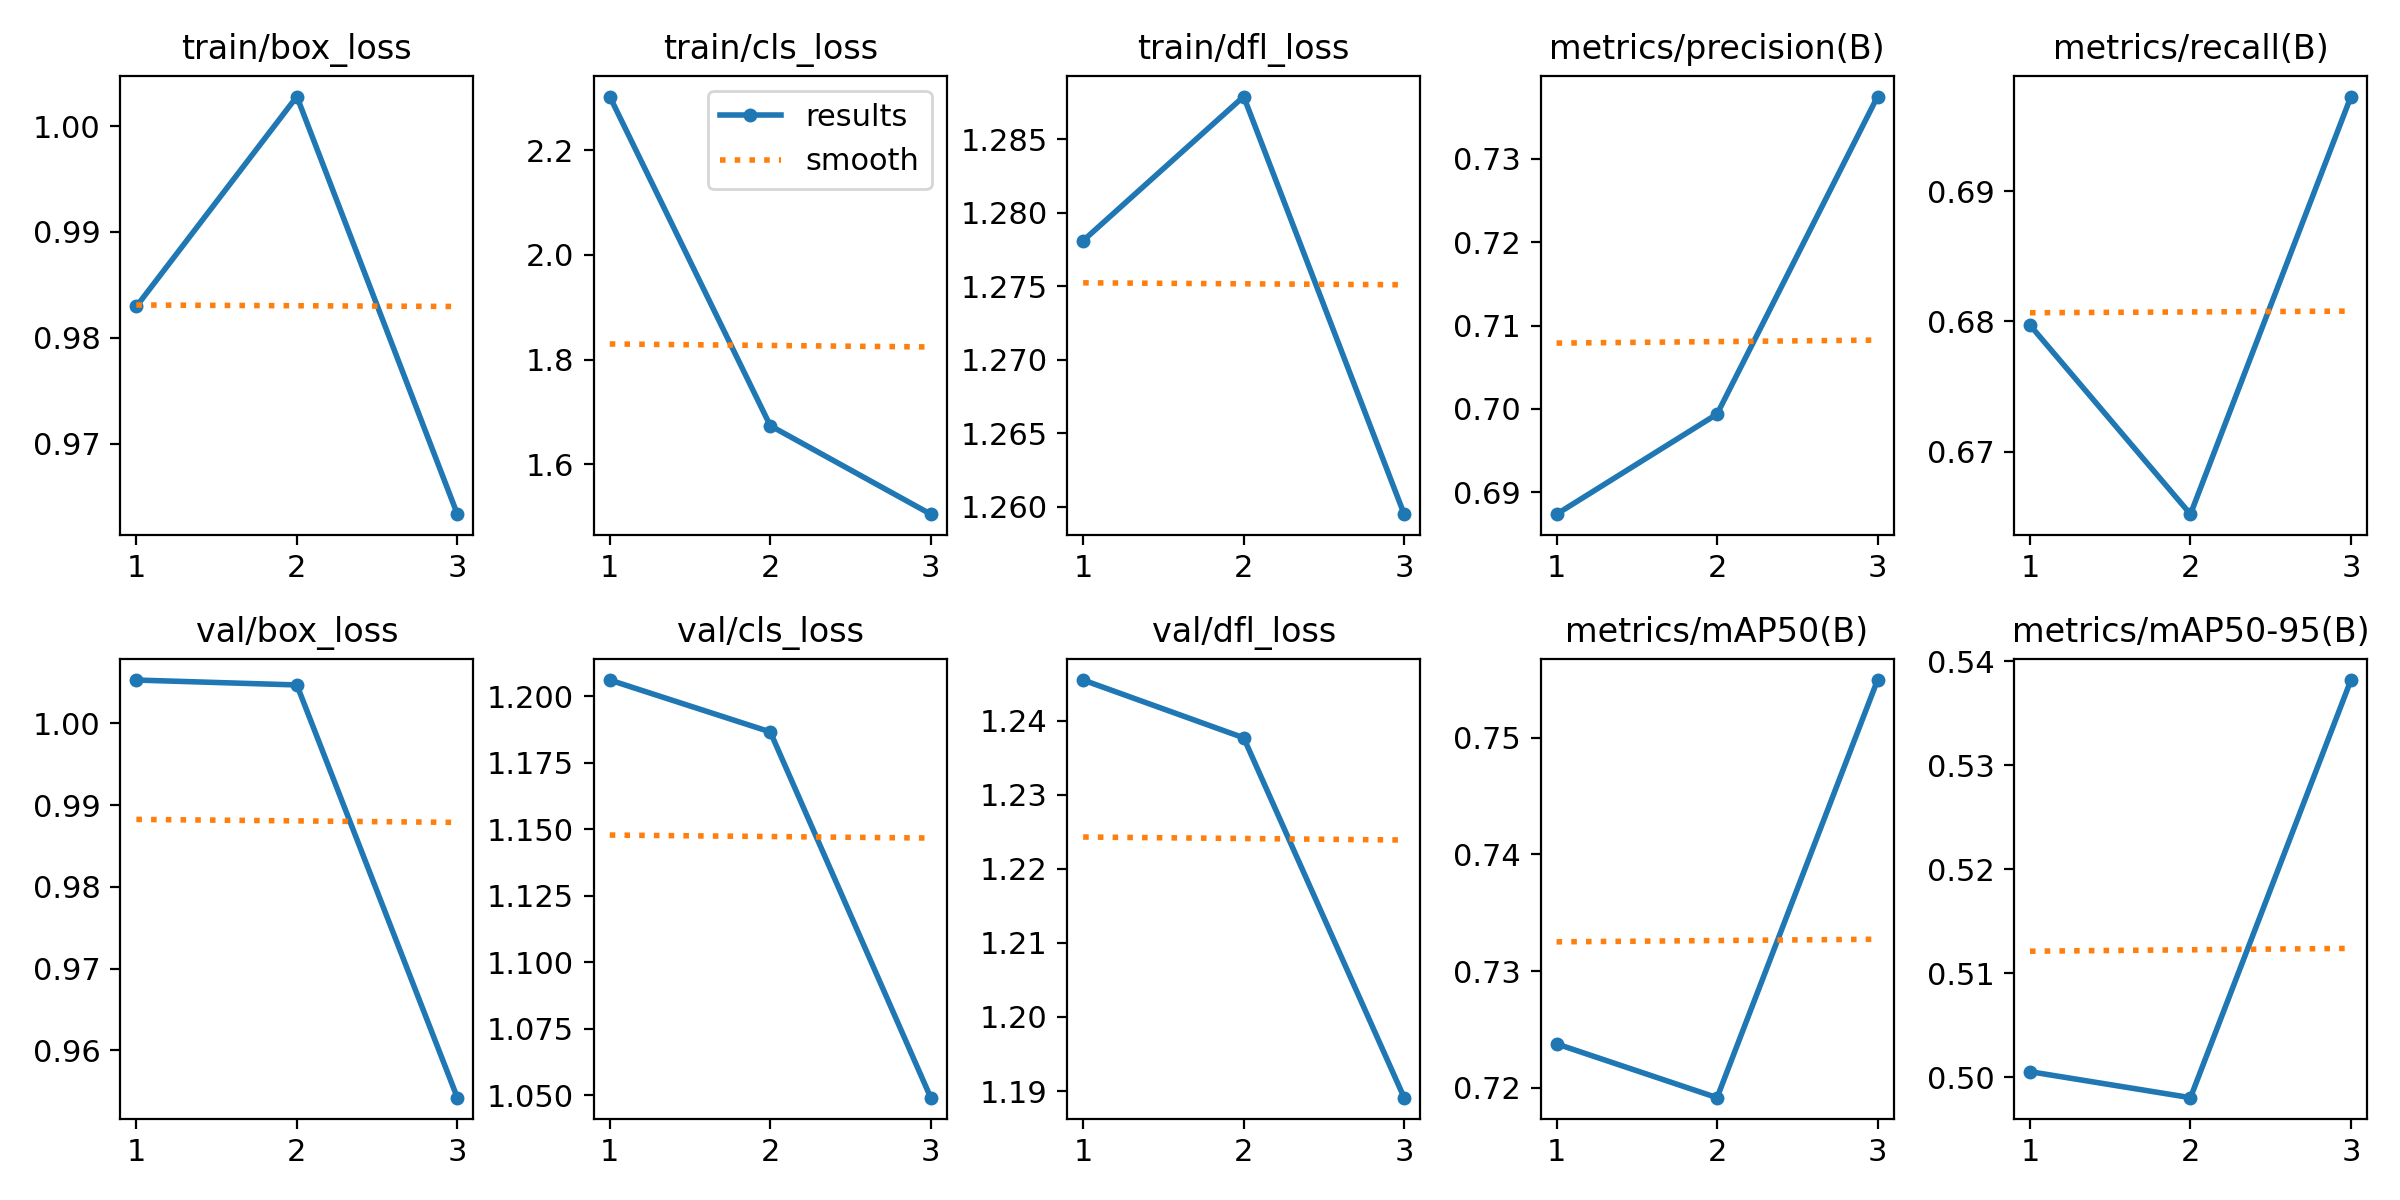

In [7]:
Image.open("/content/runs/detect/train/results.png")

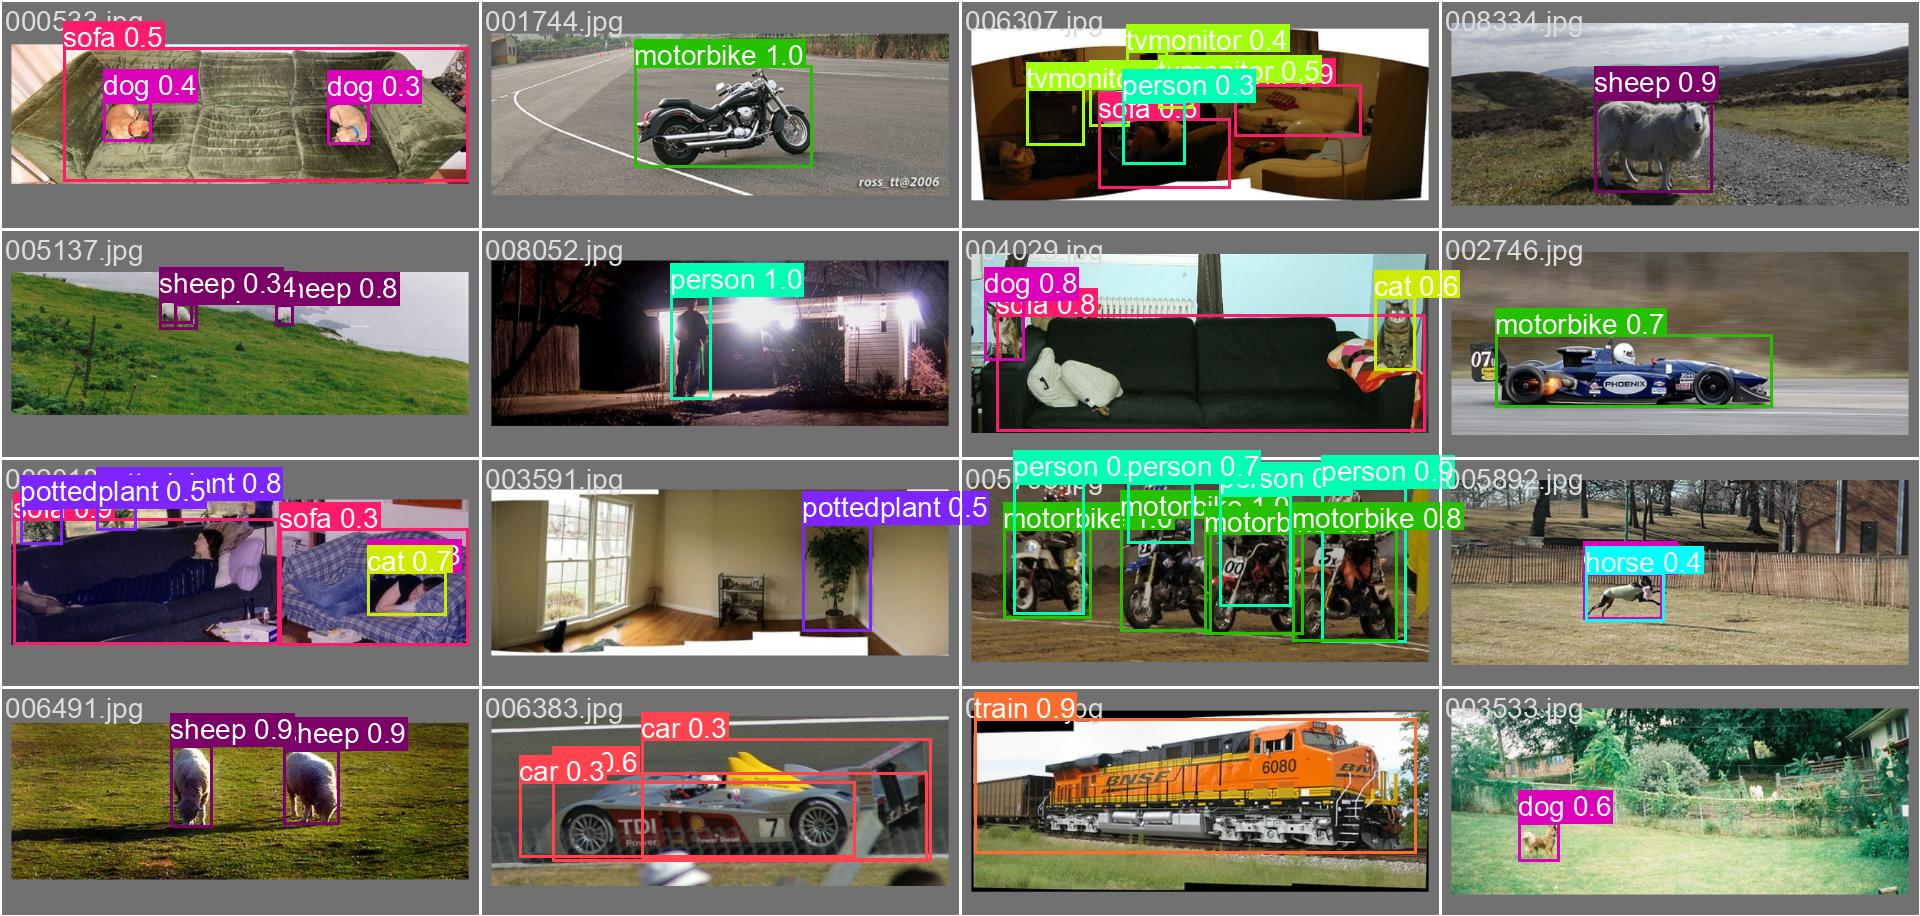

In [8]:
Image.open("/content/runs/detect/train/val_batch0_pred.jpg")

# 3. Val
Validate a model's accuracy on the Pascal-VOC dataset. The latest YOLOv8 [models](https://github.com/ultralytics/ultralytics#models) are downloaded automatically the first time they are used. See [YOLOv8 Val Docs](https://docs.ultralytics.com/modes/val/) for more information.

In [9]:
# Validate YOLOv8n on VOC val ** the model is pretrained on COCO dataset
!yolo val model=yolov8n.pt data=VOC.yaml device=0

Ultralytics YOLOv8.2.83 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs
val: Scanning /content/datasets/VOC/labels/test2007.cache... 4952 images, 0 backgrounds, 0 corrupt: 100% 4952/4952 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 310/310 [00:46<00:00,  6.65it/s]
                   all       4952      12032      0.087      0.085      0.092     0.0742
                person        204        285          0          0   0.000142   8.85e-05
               bicycle        239        337      0.876      0.776       0.88      0.645
                   car        282        459          0          0   0.000196   0.000117
            motorcycle        172        263          0          0   0.000629   0.000404
              airplane        212        469          0          0   6.72e-05   5.38e-05
                   bus        174   

In [10]:
# Validate "Our model" on VOC val
!yolo val model="/content/runs/detect/train/weights/best.pt" data=VOC.yaml device=0

Ultralytics YOLOv8.2.83 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,009,548 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/datasets/VOC/labels/test2007.cache... 4952 images, 0 backgrounds, 0 corrupt: 100% 4952/4952 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 310/310 [00:45<00:00,  6.78it/s]
                   all       4952      12032      0.736      0.698      0.754      0.539
             aeroplane        204        285      0.893       0.67      0.835       0.57
               bicycle        239        337      0.846      0.719      0.837       0.59
                  bird        282        459      0.744      0.667      0.749      0.496
                  boat        172        263      0.394      0.574       0.44      0.264
                bottle        212        469      0.631      0.725      0.714      0.485
                   bus        174     

# 5. Python Usage

YOLOv8 was reimagined using Python-first principles for the most seamless Python YOLO experience yet. YOLOv8 models can be loaded from a trained checkpoint or created from scratch. Then methods are used to train, val, predict, and export the model. See detailed Python usage examples in the [YOLOv8 Python Docs](https://docs.ultralytics.com/usage/python/).

In [11]:
from ultralytics import YOLO

# Load a model
# model = YOLO('yolov8n.yaml')  # build a new model from scratch
model = YOLO('yolov8n.pt')  # load a pretrained model (recommended for training)
model.to('cuda:0') # set up the model to GPU
# Use the model
results = model.train(data='VOC.yaml', epochs=3)  # train the model
results = model.val()  # evaluate model performance on the validation set

engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=VOC.yaml, epochs=3, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cuda:0, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False

/usr/local/lib/python3.10/dist-packages/ultralytics/engine/trainer.py:268: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(enabled=self.amp)
train: Scanning /content/datasets/VOC/labels/train2007.cache... 16551 images, 0 backgrounds, 0 corrupt: 100%|██████████| 16551/16551 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/datasets/VOC/labels/test2007.cache... 4952 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4952/4952 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000417, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/3       2.4G      0.983      2.302      1.278         50        640: 100%|██████████| 1035/1035 [05:47<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 155/155 [00:45<00:00,  3.39it/s]


                   all       4952      12032      0.687       0.68      0.724      0.501

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/3      2.31G      1.003      1.674      1.288         55        640: 100%|██████████| 1035/1035 [05:40<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 155/155 [00:41<00:00,  3.72it/s]


                   all       4952      12032      0.699      0.665      0.719      0.498

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/3      2.31G     0.9633      1.505      1.259         30        640: 100%|██████████| 1035/1035 [05:37<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 155/155 [00:44<00:00,  3.47it/s]


                   all       4952      12032      0.737      0.697      0.755      0.538

3 epochs completed in 0.324 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 6.2MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics YOLOv8.2.83 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,009,548 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 155/155 [00:50<00:00,  3.07it/s]


                   all       4952      12032      0.736      0.698      0.755      0.538
             aeroplane        204        285      0.897       0.67      0.835      0.569
               bicycle        239        337      0.853      0.727      0.841       0.59
                  bird        282        459      0.742      0.669       0.75      0.495
                  boat        172        263      0.393      0.578      0.447      0.262
                bottle        212        469      0.629      0.725      0.712      0.482
                   bus        174        213      0.815      0.793      0.867       0.73
                   car        721       1201      0.819      0.846      0.902        0.7
                   cat        322        358      0.855      0.732      0.842      0.623
                 chair        417        756      0.485      0.616      0.565      0.367
                   cow        127        244      0.783      0.639      0.745      0.522
           diningtabl

val: Scanning /content/datasets/VOC/labels/test2007.cache... 4952 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4952/4952 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 310/310 [00:51<00:00,  5.97it/s]


                   all       4952      12032      0.736      0.698      0.754      0.539
             aeroplane        204        285      0.893       0.67      0.835       0.57
               bicycle        239        337      0.846      0.719      0.837       0.59
                  bird        282        459      0.744      0.667      0.749      0.496
                  boat        172        263      0.394      0.574       0.44      0.264
                bottle        212        469      0.631      0.725      0.714      0.485
                   bus        174        213      0.815      0.793      0.867      0.731
                   car        721       1201      0.817      0.845      0.902      0.699
                   cat        322        358      0.848      0.732       0.84      0.623
                 chair        417        756      0.481      0.618      0.564      0.367
                   cow        127        244      0.781      0.639      0.747      0.525
           diningtabl

## Performance on 3 Epochs trained model

In [12]:
results = model.predict(source='/content/datasets/VOC/images/test2007/000014.jpg')
results


image 1/1 /content/datasets/VOC/images/test2007/000014.jpg: 448x640 2 cars, 1 person, 66.9ms
Speed: 3.0ms preprocess, 66.9ms inference, 2.1ms postprocess per image at shape (1, 3, 448, 640)


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'aeroplane', 1: 'bicycle', 2: 'bird', 3: 'boat', 4: 'bottle', 5: 'bus', 6: 'car', 7: 'cat', 8: 'chair', 9: 'cow', 10: 'diningtable', 11: 'dog', 12: 'horse', 13: 'motorbike', 14: 'person', 15: 'pottedplant', 16: 'sheep', 17: 'sofa', 18: 'train', 19: 'tvmonitor'}
 obb: None
 orig_img: array([[[140,  79, 145],
         [141,  80, 144],
         [139,  74, 136],
         ...,
         [239, 226, 240],
         [254, 241, 255],
         [245, 232, 246]],
 
        [[ 84,  24,  85],
         [ 75,  15,  75],
         [ 77,  13,  72],
         ...,
         [251, 235, 252],
         [255, 242, 255],
         [248, 232, 249]],
 
        [[ 71,  11,  65],
         [ 73,  14,  65],
         [ 70,  11,  61],
         ...,
         [255, 237, 255],
         [255, 235, 255],
         [246, 224, 248]],
 
        ...,
 
        [[ 26,  36, 100],
     

In [13]:
results[0].boxes.xyxy

tensor([[184.7261, 195.1324, 500.0000, 315.4029],
        [355.2039,   5.4106, 399.0825,  60.7222],
        [418.5717, 177.6469, 499.9194, 221.6768]], device='cuda:0')

In [14]:
x0,y0,x1,y1 = results[0].boxes.xyxy[0].cpu().numpy().astype(int)
x0,y0,x1,y1

(184, 195, 500, 315)

In [15]:
results[0].boxes.conf

tensor([0.9863, 0.6598, 0.4362], device='cuda:0')

In [16]:
results[0].boxes.cls

tensor([ 6., 14.,  6.], device='cuda:0')

In [17]:
from matplotlib import pyplot as plt

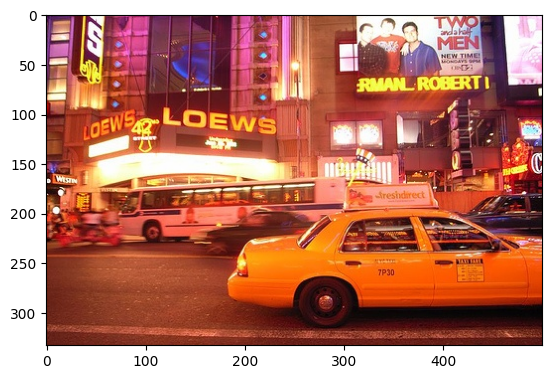

In [18]:
plt.imshow(results[0].orig_img[:, :, ::-1])

In [19]:
import cv2

In [20]:
results[0].orig_img[:, :, ::-1].shape

(333, 500, 3)

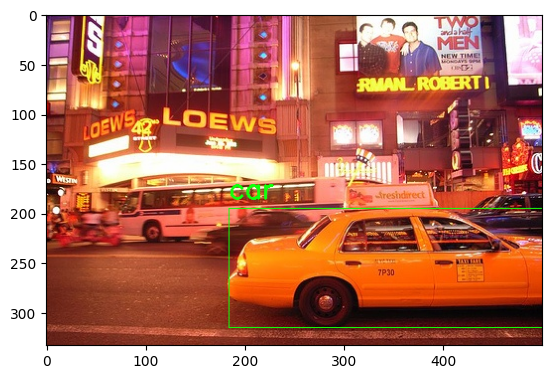

In [21]:
image = cv2.rectangle(results[0].orig_img[:, :, ::-1].copy(), (x0, y0), (x1, y1), (20,255,12), 1)
cv2.putText(image, results[0].names[results[0].boxes.cls.cpu().numpy()[0]], (x0, y0-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (20,255,12), 2)
plt.imshow(image)

# For more details on [How to Train YOLOv8 Object Detection on a Custom Dataset with Roboflow(annotations tool)](https://colab.research.google.com/github/roboflow-ai/notebooks/blob/main/notebooks/train-yolov8-object-detection-on-custom-dataset.ipynb)
 and guide by https://www.ultralytics.com/blog/training-custom-datasets-with-ultralytics-yolov8-in-google-colab
